In [22]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shutil 
from tqdm import tqdm
import pydicom as pyd

In [23]:
#Read the dataframe 
copd = pd.read_csv("/fs5/p_masi/krishar1/COPDGENE/COPD_gene_7368subjects.csv")
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
2,chest,control,1,HMB,Yes,COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1990538,African,male
3,chest,control,1,HMB,Yes,COPDGene_A00444_COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1975802,African American,male
4,chest,control,1,HMB,Yes,COPDGene_A00975_COPDGene_A00975,phs000179,GOLD_0_Control,CT,d1975803,African American,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male
7365,chest,unknown,1,HMB,Yes,COPDGene_Q77837_COPDGene_Q77837,phs000179,GOLD-U_Unclassified,CT,d1977762,African American,female
7366,chest,unknown,1,HMB,Yes,COPDGene_Q77990_COPDGene_Q77990,phs000179,GOLD-U_Unclassified,CT,d1977763,African American,female


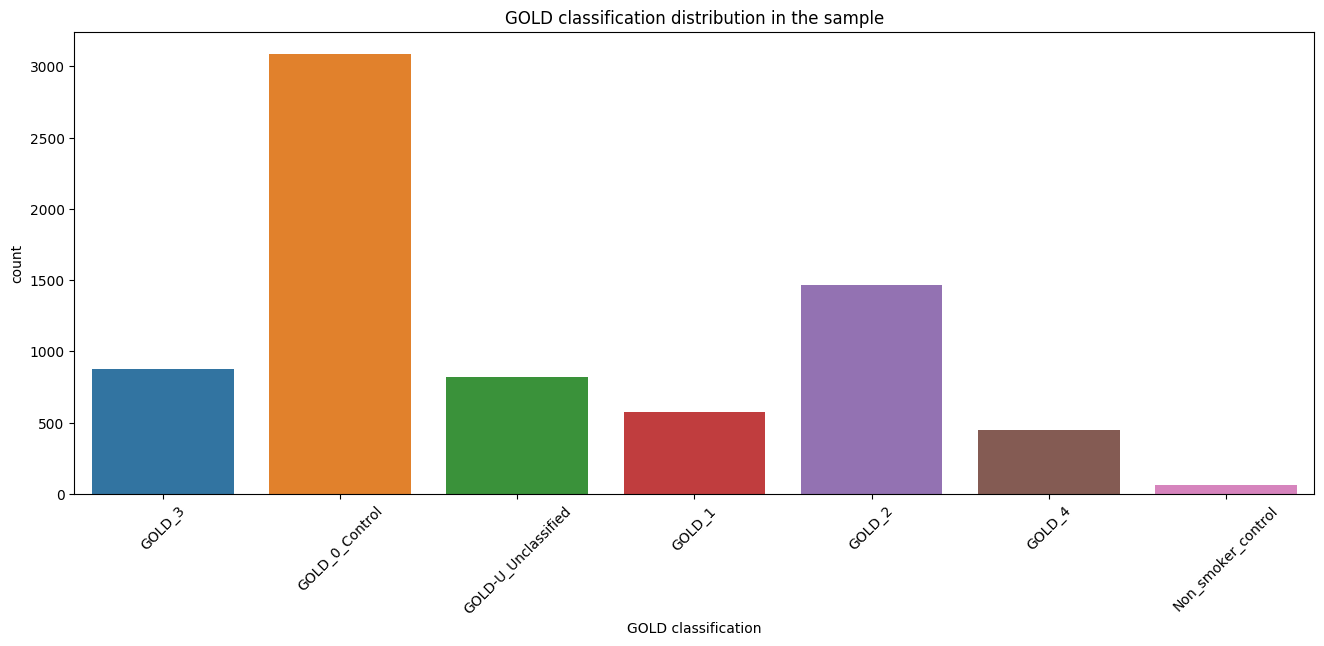

In [24]:
plt.figure(figsize=(16,6))
sns.countplot(x='GOLD classification', data=copd)
plt.title('GOLD classification distribution in the sample')
plt.xticks(rotation=45)
plt.show()

In [26]:
#GOLD 0 is controls which means that subjects do not have COPD. Locate subjects that have GOLD 0. Remove controls and unclassified 
copd.loc[copd['GOLD classification'] == 'GOLD_0_Control']

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
2,chest,control,1,HMB,Yes,COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1990538,African,male
3,chest,control,1,HMB,Yes,COPDGene_A00444_COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1975802,African American,male
4,chest,control,1,HMB,Yes,COPDGene_A00975_COPDGene_A00975,phs000179,GOLD_0_Control,CT,d1975803,African American,male
9,chest,control,1,HMB,Yes,COPDGene_A02050_COPDGene_A02050,phs000179,GOLD_0_Control,CT,d1976718,African American,female
10,chest,control,1,HMB,Yes,COPDGene_A02098,phs000179,GOLD_0_Control,CT,d1990706,African,female
...,...,...,...,...,...,...,...,...,...,...,...,...
7358,chest,control,1,HMB,Yes,COPDGene_Q77225_COPDGene_Q77225,phs000179,GOLD_0_Control,CT,d1981234,Caucasian,male
7359,chest,control,1,HMB,Yes,COPDGene_Q77279_COPDGene_Q77279,phs000179,GOLD_0_Control,CT,d1982385,Caucasian,female
7360,chest,control,1,HMB,Yes,COPDGene_Q77306,phs000179,GOLD_0_Control,CT,d1992315,Caucasian,female
7361,chest,control,1,HMB,Yes,COPDGene_Q77306_COPDGene_Q77306,phs000179,GOLD_0_Control,CT,d1982386,Caucasian,female


In [27]:
copd = copd.drop(copd[copd['GOLD classification'] == 'GOLD-U_Unclassified'].index)
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
2,chest,control,1,HMB,Yes,COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1990538,African,male
3,chest,control,1,HMB,Yes,COPDGene_A00444_COPDGene_A00444,phs000179,GOLD_0_Control,CT,d1975802,African American,male
4,chest,control,1,HMB,Yes,COPDGene_A00975_COPDGene_A00975,phs000179,GOLD_0_Control,CT,d1975803,African American,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7361,chest,control,1,HMB,Yes,COPDGene_Q77306_COPDGene_Q77306,phs000179,GOLD_0_Control,CT,d1982386,Caucasian,female
7362,chest,control,1,HMB,Yes,COPDGene_Q77372_COPDGene_Q77372,phs000179,GOLD_0_Control,CT,d1981235,Caucasian,male
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male


In [28]:
copd = copd.drop(copd[copd['GOLD classification'] == 'GOLD_0_Control'].index)
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
7,chest,unknown,1,HMB,Yes,COPDGene_A01133_COPDGene_A01133,phs000179,GOLD_1,CT,d1983937,Caucasian,female
12,chest,unknown,1,HMB,Yes,COPDGene_A02797_COPDGene_A02797,phs000179,GOLD_1,CT,d1977943,African American,female
15,chest,case,1,HMB,Yes,COPDGene_A04808,phs000179,GOLD_3,CT,d1990454,African,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7352,chest,case,1,HMB,Yes,COPDGene_Q75550_COPDGene_Q75550,phs000179,GOLD_3,CT,d1980079,Caucasian,female
7354,chest,case,1,HMB,Yes,COPDGene_Q75847_COPDGene_Q75847,phs000179,GOLD_2,CT,d1979186,Caucasian,female
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male


In [29]:
copd = copd.drop(copd[copd['GOLD classification'] == 'GOLD_1'].index)
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
15,chest,case,1,HMB,Yes,COPDGene_A04808,phs000179,GOLD_3,CT,d1990454,African,male
16,chest,case,1,HMB,Yes,COPDGene_A04808_COPDGene_A04808,phs000179,GOLD_3,CT,d1975491,African American,male
17,chest,case,1,HMB,Yes,COPDGene_A05032_COPDGene_A05032,phs000179,GOLD_2,CT,d1978067,Caucasian,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7352,chest,case,1,HMB,Yes,COPDGene_Q75550_COPDGene_Q75550,phs000179,GOLD_3,CT,d1980079,Caucasian,female
7354,chest,case,1,HMB,Yes,COPDGene_Q75847_COPDGene_Q75847,phs000179,GOLD_2,CT,d1979186,Caucasian,female
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male


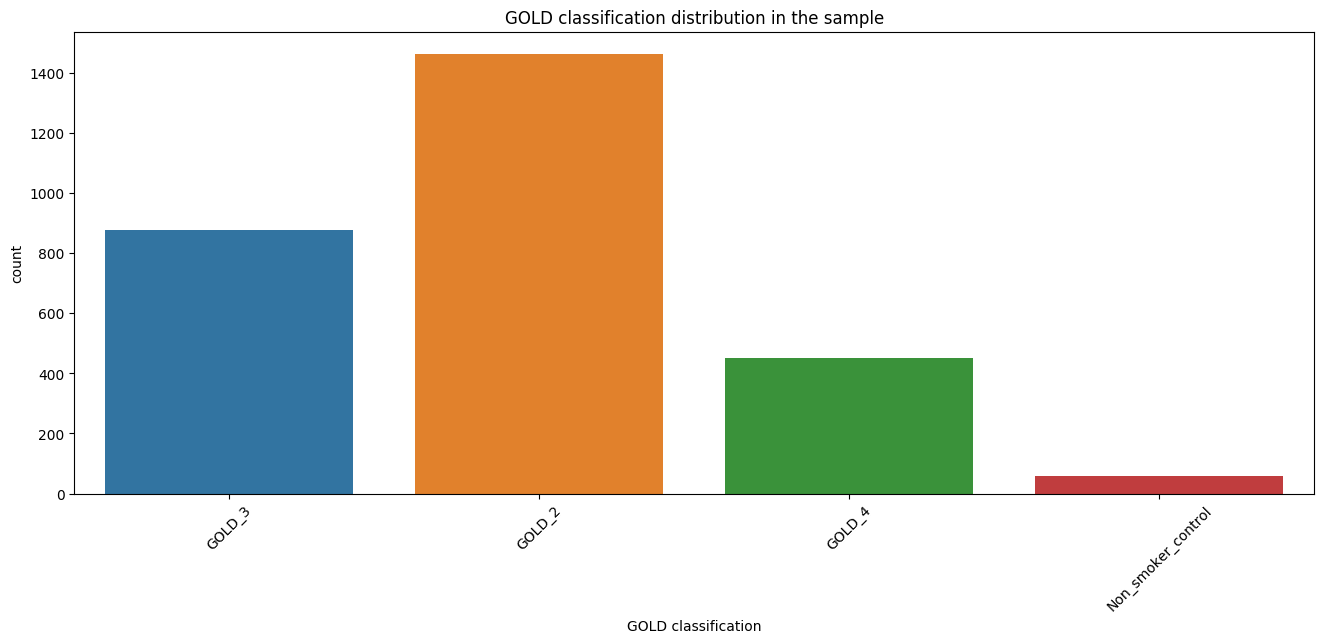

In [30]:
plt.figure(figsize=(16,6))
sns.countplot(x='GOLD classification', data=copd)
plt.title('GOLD classification distribution in the sample')
plt.xticks(rotation=45)
plt.show()

In [32]:
copd = copd.drop(copd[copd['GOLD classification'] == 'Non_smoker_control'].index)
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex
0,chest,case,2,DS-CS,Yes,COPDGene_A00282,phs000179,GOLD_3,CT,d1992781,Caucasian,female
1,chest,case,2,DS-CS,Yes,COPDGene_A00282_COPDGene_A00282,phs000179,GOLD_3,CT,d1984662,Caucasian,female
15,chest,case,1,HMB,Yes,COPDGene_A04808,phs000179,GOLD_3,CT,d1990454,African,male
16,chest,case,1,HMB,Yes,COPDGene_A04808_COPDGene_A04808,phs000179,GOLD_3,CT,d1975491,African American,male
17,chest,case,1,HMB,Yes,COPDGene_A05032_COPDGene_A05032,phs000179,GOLD_2,CT,d1978067,Caucasian,male
...,...,...,...,...,...,...,...,...,...,...,...,...
7352,chest,case,1,HMB,Yes,COPDGene_Q75550_COPDGene_Q75550,phs000179,GOLD_3,CT,d1980079,Caucasian,female
7354,chest,case,1,HMB,Yes,COPDGene_Q75847_COPDGene_Q75847,phs000179,GOLD_2,CT,d1979186,Caucasian,female
7363,chest,case,1,HMB,Yes,COPDGene_Q77447_COPDGene_Q77447,phs000179,GOLD_2,CT,d1978508,Caucasian,male
7364,chest,case,1,HMB,Yes,COPDGene_Q77609_COPDGene_Q77609,phs000179,GOLD_2,CT,d1978509,Caucasian,male


In [35]:
copd.to_csv("/fs5/p_masi/krishar1/COPDGENE/COPD_gene_COPDsubjects.csv", index=False)

In [ ]:
#Get list of file names 
file_names = copd['File Name'].to_list()
source = '/fs5/p_masi/krishar1/COPDGENE/SPIE_2025'

for file in tqdm(file_names):
    if file in os.listdir(source):
        print("Name:", os.listdir(os.path.join(source, file)))

In [ ]:
#The directory is either 19000101 or the usual
file_names = copd['File Name'].to_list()
source = '/fs5/p_masi/krishar1/COPDGENE/SPIE_2025' 

#Append all files to a list 
files = []

for dirpath, dirnames, filenames in os.walk(source):
    for filename in filenames:
        if filename in file_names:
            files.append(os.path.join(dirpath, filename))